In [1]:
from tensorflow.keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 252s 14us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
'''Decodes the review. Note that the indices are offset by 3 
        because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”'''
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


1641221/1641221 [==============================] - 41s 25us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
#Encoding the integer sequences into a binary matrix
'''Explaination: I first created 2D matrix of shape(number of examples,10000)
        then I looped over each word of each example, if it exist put 1 in its place
        if not just leave it as 0
        ITS JUST ONE HOT ENCODER'''
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [8]:
X_train.shape

(25000, 10000)

In [9]:
#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [11]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [12]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 133ms/step - loss: 0.5292 - binary_accuracy: 0.7705 - val_loss: 0.4111 - val_binary_accuracy: 0.8440
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3273 - binary_accuracy: 0.8939 - val_loss: 0.3156 - val_binary_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2432 - binary_accuracy: 0.9223 - val_loss: 0.3179 - val_binary_accuracy: 0.8696
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2006 - binary_accuracy: 0.9341 - val_loss: 0.2759 - val_binary_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1656 - binary_accuracy: 0.9467 - val_loss: 0.2752 - val_binary_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1432 - binary_accuracy: 0.9537 - val_loss: 0.3004 - val_binary_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - lo

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

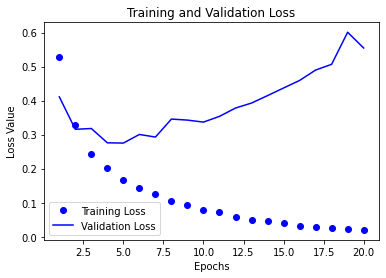

In [16]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

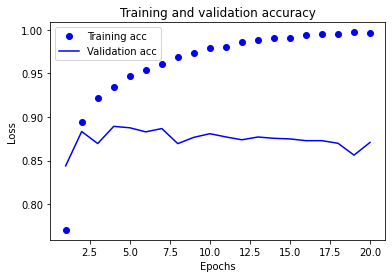

In [17]:
plt.clf() #Clears the figure 
acc_values = history_dict['binary_accuracy'] 
val_acc_values = history_dict['val_binary_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

In [18]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=4, batch_size=512) 


Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4635 - accuracy: 0.8115
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2717 - accuracy: 0.9011
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2146 - accuracy: 0.9221
Epoch 4/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1848 - accuracy: 0.9324


In [19]:
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2835 - accuracy: 0.8861


In [20]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 3s 3ms/step


In [21]:
result

array([[0.20818166],
       [0.99988455],
       [0.82440317],
       ...,
       [0.1077884 ],
       [0.08044503],
       [0.5045103 ]], dtype=float32)

In [22]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.asarray([round(x) for x in score])

In [23]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [24]:
from tensorflow.keras.metrics import mean_absolute_error
mae = mean_absolute_error = (y_pred, y_test)

In [25]:
# Error
mae

(array([0., 1., 1., ..., 0., 0., 1.]),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))